In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train[0].shape

(28, 28)

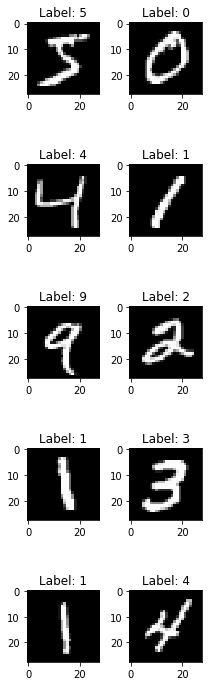

In [4]:
num_row=5
num_col=2
num= 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
28*28

784

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train[:1].shape

(1, 28, 28)

In [11]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.22038291,  0.44167343,  0.6836578 ,  0.10384845, -0.67783946,
        -0.45662397, -0.7365995 ,  0.7558854 ,  0.24329425, -0.6162216 ]],
      dtype=float32)

In [12]:
predictions.shape

(1, 10)

In [ ]:
x_train[:1].shape

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.10880095, 0.13574941, 0.1729141 , 0.0968328 , 0.04431387,
        0.05528564, 0.04178501, 0.18586539, 0.11132251, 0.04713028]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
predictions

array([[ 0.22038291,  0.44167343,  0.6836578 ,  0.10384845, -0.67783946,
        -0.45662397, -0.7365995 ,  0.7558854 ,  0.24329425, -0.6162216 ]],
      dtype=float32)

In [15]:
loss_fn(y_train[:1], predictions).numpy()

2.895242

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2946 - accuracy: 0.9135
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1430 - accuracy: 0.9578
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1081 - accuracy: 0.9666
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0880 - accuracy: 0.9730
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0763 - accuracy: 0.9758
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0665 - accuracy: 0.9789
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0593 - accuracy: 0.9815
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0550 - accuracy: 0.9822
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0495 - accuracy: 0.9838
Epoch 10/10
60

In [20]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0699 - accuracy: 0.9799


[0.06990076270719292, 0.9799]

In [22]:
# x_test[0].reshape(1,28,28)

In [28]:
model.predict_classes(x_test[0].reshape(1,28,28))

array([7], dtype=int64)

In [24]:
y_test[0]

7

In [29]:
x_test[:5].shape

(5, 28, 28)

In [25]:
model.predict_classes(x_test[:5])

array([7, 2, 1, 0, 4], dtype=int64)

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)